# <center> PHẦN 2. KHÁM PHÁ DỮ LIỆU & ĐẶT CÂU HỎI

# Tổng quan về tiền xử lý dữ liệu
Mục tiêu chính:
## A. Làm sạch dữ liệu (Exploratory Data Analysis - EDA):
1. Khám phá dữ liệu: Đưa ra những đánh giá đầu tiên về dữ liệu để hiểu cấu trúc và ý nghĩa của chúng.
Trước khi xử lý, chúng ta cần hiểu rõ cấu trúc và nội dung của dữ liệu. Các hoạt động bao gồm:

+ Kiểm tra số lượng dòng, cột.
Xác định kiểu dữ liệu của từng cột (số, phân loại, ngày tháng, ...).
+ Kiểm tra tỷ lệ dữ liệu bị thiếu, các giá trị bất thường.
+ Tóm tắt các thống kê cơ bản như trung bình, giá trị nhỏ nhất/lớn nhất, phương sai, ...

(Bước này làm giống format HW2)

2. Xử lý dữ liệu thiếu  (Handling Missing Data):
Dữ liệu thiếu thường gây sai lệch trong phân tích. Chúng ta sẽ điền giá trị bị thiếu bằng các phương pháp như:
+ Giá trị trung bình/median.
+ Thuật toán Machine Learning. Ae chú ý là cần áp dụng đúng model, ví dụ như đối với kiểu dữ liệu là Category (phân lớp) thì nên sử dụng KNN, hoặc int64 (Liên tục) thì xài Linear Regression,....
+ Hoặc loại bỏ các dòng/cột chứa quá nhiều giá trị bị thiếu nếu cần thiết.

3. Xử lý dữ liệu nhiễu: Loại bỏ các giá trị bất thường (outliers) để đảm bảo dữ liệu sạch (Sử dụng  phương pháp như IQR (Interquartile Range) để phát hiện và loại bỏ những giá trị nằm ngoài phạm vi hợp lý.)

4. Chuẩn hóa kiểu dữ liệu:
- Chuyển đổi dữ liệu về đúng kiểu cần thiết (ví dụ: chuyển đổi ngày tháng, số nguyên, số thực).
- Mã hóa dữ liệu phân loại (categorical data) thành dạng số, phù hợp với mô hình (Label Encoding hoặc One-hot Encoding). (nếu cảm thấy cần thiết)
P/s: Thứ tự các bước trên có thể thay đổi, tùy theo ae thiết kế


## B. Giảm chiều dữ liệu(Dimensionality Reduction): Giảm độ phức tạp
1..Khám phá dữ liệu (Tiếp theo):
- Trực quan hóa mối quan hệ giữa các biến để xác định những biến dư thừa, không cần thiết.
- Sử dụng ma trận tương quan (Correlation Matrix) để xem xét độ tương quan giữa các biến:
  - Loại bỏ các biến có độ tương quan cao (vì có thể gây trùng lặp thông tin).
  - Giữ lại các biến quan trọng nhất để giảm độ phức tạp và tăng hiệu quả phân tích.

## C. Chuẩn hóa dữ liệu (Nếu còn thời gian)
- Min-Max Scaling: Đưa dữ liệu về khoảng [0, 1].
- Z-score Standardization: Chuẩn hóa dữ liệu thành phân phối chuẩn với trung bình bằng 0 và phương sai bằng 1.
- Robust Scaling: Loại bỏ tác động của các giá trị ngoại lai khi chuẩn hóa.
- Decimal Scaling: Chia giá trị cho lũy thừa của 10 để thu hẹp giá trị dữ liệu.

## D. Rời rạc hóa dữ liệu (Tìm hiểu thêm)

## E. Lưu dữ liệu sạch: Dữ liệu sau khi tiền xử lý sẽ được lưu lại để sử dụng trong các giai đoạn phân tích tiếp theo.

# Import các thư viện cần thiết


In [1]:
import requests
import json
import pandas as pd
import numpy as np
import time
import datetime
import calendar

import matplotlib.pyplot as plt
import seaborn as sns

# Xử lý file match_overview.csv

Đọc dữ liệu từ file match_overview.csv

In [2]:
match_overview_file_name = "./data/raw_data/match_overview.csv"
raw_df_match_overview = pd.read_csv(match_overview_file_name)
raw_df_match_overview.head(10)

,Match ID,Date,Season,Stadium,Number of Attendance,Referee,Home Team,Away Team,Home Lineup,Away Lineup,Fulltime Score
0,3050173.0,2018-08-11,18/19,St James' Park,51749.0,Martin Atkinson,Newcastle United,Tottenham Hotspur,4-4-1-1,4-3-2-1,1:2
1,3050169.0,2018-08-11,18/19,Craven Cottage,24821.0,Mike Dean,Fulham FC,Crystal Palace,4-3-3 Attacking,4-4-2,0:2
2,3050168.0,2018-08-11,18/19,Vitality Stadium,10353.0,Kevin Friend,AFC Bournemouth,Cardiff City,4-4-2 double 6,4-1-4-1,2:0
3,3050176.0,2018-08-11,18/19,Molineux Stadium,31231.0,Craig Pawson,Wolverhampton Wanderers,Everton FC,3-4-3,4-2-3-1,2:2
4,3050172.0,2018-08-10,18/19,Old Trafford,74439.0,Andre Marriner,Manchester United,Leicester City,4-1-4-1,4-4-2 double 6,2:1
5,3050170.0,2018-08-11,18/19,John Smith's Stadium,24121.0,Chris Kavanagh,Huddersfield Town,Chelsea FC,3-5-2 flat,4-3-3 Attacking,0:3
6,3050175.0,2018-08-11,18/19,Vicarage Road,20051.0,Jonathan Moss,Watford FC,Brighton & Hove Albion,4-4-2 double 6,4-4-1-1,2:0
7,3050167.0,2018-08-12,18/19,Emirates Stadium,59934.0,Michael Oliver,Arsenal FC,Manchester City,4-2-3-1,4-2-3-1,0:2
8,3050171.0,2018-08-12,18/19,Anfield,53235.0,Anthony Taylor,Liverpool FC,West Ham United,4-3-3 Attacking,4-2-3-1,4:0
9,3050179.0,2018-08-18,18/19,Cardiff City Stadium,30720.0,Craig Pawson,Cardiff City,Newcastle United,4-1-4-1,4-4-1-1,0:0


# A.1. Khám phá dữ liệu

# Khám phá dữ liệu
## Dữ liệu có bao nhiêu hàng, bao nhiêu cột?


In [3]:
row_num = raw_df_match_overview.shape[0]
col_num = raw_df_match_overview.shape[1]
shape = (row_num, col_num)

print(f"Số dòng và số cột của dữ liệu lần lượt là: {shape}")

Số dòng và số cột của dữ liệu lần lượt là: (3800, 11)


Kết quả trên được in ra là 3800 dòng và có 11 cột và kết quả này đúng như mong đợi. Trong đó, 11 cột thuộc tính dữ liệu đã được định ra trước, 3800 dòng dữ liệu tương đương với 38 trận mỗi mùa giải, và nhóm quyết định thu thập dữ liệu cho 10 mùa giải. Vậy tổng lại, với kết quả thu được là 3800 dòng và 11 cột thì đúng như mong đợi

## Dữ liệu các dòng có bị lặp không?

In [4]:
num_duplicated_rows = raw_df_match_overview.duplicated().sum()
if num_duplicated_rows == 0:
    print(f"Dữ liệu không có dòng lặp!")
else:
    print(f"Dữ liệu có {num_duplicated_rows} dòng lặp.")

Dữ liệu có 77 dòng lặp.


In [5]:
duplicated_rows = raw_df_match_overview[raw_df_match_overview.duplicated()]
duplicated_rows

,Match ID,Date,Season,Stadium,Number of Attendance,Referee,Home Team,Away Team,Home Lineup,Away Lineup,Fulltime Score
94,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,Unknown,NaN,NaN,Unknown
174,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,Unknown,NaN,NaN,Unknown
221,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,Unknown,NaN,NaN,Unknown
313,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,Unknown,NaN,NaN,Unknown
357,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,Unknown,NaN,NaN,Unknown
...,...,...,...,...,...,...,...,...,...,...,...
3686,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,Unknown,NaN,NaN,Unknown
3691,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,Unknown,NaN,NaN,Unknown
3708,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,Unknown,NaN,NaN,Unknown
3715,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,Unknown,NaN,NaN,Unknown


Ta thấy các dòng bị lặp đa số là những trận không có thông tin, vì vậy ta cũng sẽ loại bỏ những dòng đó đi

In [6]:
raw_df_match_overview = raw_df_match_overview.drop_duplicates()

In [7]:
num_duplicated_rows = raw_df_match_overview.duplicated().sum()
if num_duplicated_rows == 0:
    print(f"Dữ liệu không có dòng lặp!")
else:
    print(f"Dữ liệu có {num_duplicated_rows} dòng lặp.")

Dữ liệu không có dòng lặp!


## Ý nghĩa của các cột dữ liệu

- Quan sát tổng thể ta có thể thấy tương ứng cho mỗi dòng tương ứng với các số liệu chung của **một trận đấu bóng đá** trong một mùa giải nhất định

- Trong dữ liệu có cột **Season** và **Date** được dùng để lưu trữ mùa giải, ngày của các trận đấu xảy ra.

- Bên cạnh đó, cột **Stadium** ghi nhận tên sân vận động nơi trận đấu được tổ chức, giúp xác định địa điểm thi đấu.

- Cột Attendance ghi lại số lượng khán giả tham dự trận đấu, thể hiện mức độ quan tâm của người hâm mộ.

- Dữ liệu cũng bao gồm thông tin về các đội tham gia, với cột **Home Team** và **Away Team** lần lượt ghi nhận tên đội chủ nhà và đội khách.

- Các cột **Home Lineup** và **Away Lineup** cung cấp thông tin về đội hình xuất phát của hai đội, ví dụ: "4-3-3", "3-5-2 flat",...Điều này có thể phản ánh được rằng những đội thắng thường sử dụng sơ đồ đội hình nào.

- Kết quả trận đấu được thể hiện thông qua cột **Fulltime Score** (tỷ số cuối cùng), điều này

- Cuối cùng, cột **Referee** ghi lại tên trọng tài điều khiển trận đấu, hỗ trợ phân tích vai trò của trọng tài trong trận.


Ngoài ra, chúng ta cũng sẽ xem thử là mỗi cột dữ liệu sẽ có kiểu dữ liệu như thế nào

In [8]:
get_dtypes = raw_df_match_overview.dtypes
get_dtypes

Match ID                float64
Date                     object
Season                   object
Stadium                  object
Number of Attendance    float64
Referee                  object
Home Team                object
Away Team                object
Home Lineup              object
Away Lineup              object
Fulltime Score           object
dtype: object

## Tỷ lệ thiếu dữ liệu ra sao?

- Trước khi phân tích tỷ lệ thiếu dữ liệu, ta cần làm rõ các cột có kiểu dữ liệu như thế nào.

- Trước tiên, ta nhận thấy là các cột đều có kiểu dữ liệu là **object** ngoại trừ cột **Match ID** và cột **Number of Attendance**. Sau khi xem xét kỹ lại, thì các cột đã ở đúng dạng dữ liệu của nó, nhưng cột **Match ID** ở dạng *float64* và **Number of attendance** ở dạng *float64* không có ý nghĩa nhiều về mặt phân tích. Vì vậy, chúng ta cũng sẽ chuyển đổi kiểu dữ liệu của chúng về dạng **object**

In [9]:
raw_df_match_overview['Match ID'] = raw_df_match_overview['Match ID'].fillna(0).astype(int).astype(str)
raw_df_match_overview["Number of Attendance"] = raw_df_match_overview["Number of Attendance"].astype(str)
raw_df_match_overview.dtypes

Match ID                object
Date                    object
Season                  object
Stadium                 object
Number of Attendance    object
Referee                 object
Home Team               object
Away Team               object
Home Lineup             object
Away Lineup             object
Fulltime Score          object
dtype: object

# A.2.Xử lý dữ liệu thiếu

Trong bộ dữ liệu này, do không có cột dữ liệu nào là **numeric data** nên chúng ta sẽ không thể trực quan được sự phân phối của mỗi cột dữ liệu. Chúng ta chỉ có thể xem xét được lượng dữ liệu bị thiếu.

In [10]:
missing_data = raw_df_match_overview.isnull().sum()
print(missing_data)

Match ID                0
Date                    1
Season                  1
Stadium                 1
Number of Attendance    0
Referee                 1
Home Team               0
Away Team               0
Home Lineup             3
Away Lineup             2
Fulltime Score          0
dtype: int64


In [11]:
raw_df_match_overview

,Match ID,Date,Season,Stadium,Number of Attendance,Referee,Home Team,Away Team,Home Lineup,Away Lineup,Fulltime Score
0,3050173,2018-08-11,18/19,St James' Park,51749.0,Martin Atkinson,Newcastle United,Tottenham Hotspur,4-4-1-1,4-3-2-1,1:2
1,3050169,2018-08-11,18/19,Craven Cottage,24821.0,Mike Dean,Fulham FC,Crystal Palace,4-3-3 Attacking,4-4-2,0:2
2,3050168,2018-08-11,18/19,Vitality Stadium,10353.0,Kevin Friend,AFC Bournemouth,Cardiff City,4-4-2 double 6,4-1-4-1,2:0
3,3050176,2018-08-11,18/19,Molineux Stadium,31231.0,Craig Pawson,Wolverhampton Wanderers,Everton FC,3-4-3,4-2-3-1,2:2
4,3050172,2018-08-10,18/19,Old Trafford,74439.0,Andre Marriner,Manchester United,Leicester City,4-1-4-1,4-4-2 double 6,2:1
...,...,...,...,...,...,...,...,...,...,...,...
3795,4095461,2024-05-19,23/24,Bramall Lane,29116.0,Andrew Madley,Sheffield United,Tottenham Hotspur,5-3-2,4-2-3-1,0:3
3796,4095443,2024-05-11,23/24,Goodison Park,39221.0,Stuart Attwell,Everton FC,Sheffield United,4-4-1-1,3-5-2 flat,1:0
3797,4095459,2024-05-19,23/24,Kenilworth Road,12027.0,Matthew Donohue,Luton Town,Fulham FC,3-4-3,4-2-3-1,2:4
3798,4095452,2024-05-19,23/24,Emirates Stadium,60312.0,Michael Oliver,Arsenal FC,Everton FC,4-3-3 Attacking,4-4-1-1,2:1


In [12]:
raw_df_match_overview = raw_df_match_overview.drop(index=89)
missing_data = raw_df_match_overview.isnull().sum()
print(missing_data)

Match ID                0
Date                    0
Season                  0
Stadium                 0
Number of Attendance    0
Referee                 0
Home Team               0
Away Team               0
Home Lineup             2
Away Lineup             1
Fulltime Score          0
dtype: int64


Nhận thấy số dòng dữ liệu bị thiếu là rất ít, và hầu như chỉ thiếu ở 2 cột là **Home Lineup** và **Away Lineup**. Sau khi tìm hiểu nguyên nhân, thì nhóm được phát hiện nguyên nhân không *crawl* được thông tin hiển thị đội hình ở các trận này format không giống các trận khác mặc dù thông tin đó vẫn hiển thị. Vì vậy nhóm tiến hành thực hiện thủ công điền bằng tay ở những chỗ bị thiếu.

In [13]:
rows_with_missing_data = raw_df_match_overview[raw_df_match_overview.isnull().any(axis=1)]
print(rows_with_missing_data)

     Match ID        Date Season          Stadium Number of Attendance  \
3224  3838278  2023-01-04  22/23      Elland Road              36173.0   
3289  3838733  2023-03-05  22/23  The City Ground              29353.0   
3297  3838723  2023-03-11  22/23    Goodison Park              39036.0   

           Referee          Home Team        Away Team Home Lineup  \
3224   David Coote       Leeds United  West Ham United         NaN   
3289   John Brooks  Nottingham Forest       Everton FC     4-3-2-1   
3297  Simon Hooper         Everton FC     Brentford FC         NaN   

          Away Lineup Fulltime Score  
3224          4-1-4-1            2:2  
3289              NaN            2:2  
3297  4-3-3 Attacking            1:0  


In [14]:
# raw_df_match_overview['Home Lineup'] = raw_df_match_overview['Home Lineup'].astype(str)
# raw_df_match_overview['Away Lineup'] = raw_df_match_overview['Away Lineup'].astype(str)

In [15]:
raw_df_match_overview.loc[raw_df_match_overview['Match ID'] == "3838278", "Home Lineup"] = "4-4-2 double 6"
raw_df_match_overview.loc[raw_df_match_overview['Match ID'] == "3838733", "Away Lineup"] = "4-5-1"
raw_df_match_overview.loc[raw_df_match_overview['Match ID'] == "3838723", "Home Lineup"] = "4-5-1"

In [16]:
missing_data = raw_df_match_overview.isnull().sum()
print(missing_data)

Match ID                0
Date                    0
Season                  0
Stadium                 0
Number of Attendance    0
Referee                 0
Home Team               0
Away Team               0
Home Lineup             0
Away Lineup             0
Fulltime Score          0
dtype: int64


# A.3. Xử lý dữ liệu nhiễu

Giá trị nhiễu thường được định nghĩa là các giá trị bất thường, không hợp lý hoặc không phù hợp với bối cảnh phân tích. Tuy nhiên, trong trường hợp này, do tất cả các cột là dạng object, rất khó xác định tiêu chí nào để phân biệt giá trị hợp lệ và giá trị nhiễu. Vì vậy nhóm quyết định sẽ không xử lý phần này

# B. Giảm chiều dữ liệu


Do mục tiêu của nhóm là dự đoán kết quả trận đấu bóng đá, nên các thông tin sau có thể gây dư thừa:
1. Stadium : Thông tin về sân vận động có thể ảnh hưởng đến điều kiện thi đấu (như sân nhà, sân khách), nhưng đã được phản ánh gián tiếp qua cột Home Team và Away Team. Việc giữ lại cột này không bổ sung thêm giá trị cho mô hình dự đoán.

2. Referee: Trọng tài có thể ảnh hưởng đến một số quyết định trong trận đấu, nhưng họ không giúp xác định được đội nào có khả năng chiến thắng cao hơn.

3. Number of Attendance : Dữ liệu về số khán giả thể hiện mức độ quan tâm đến trận đấu, nhưng không có tác động trực tiếp đến kết quả.

- Ngoài ra, nhóm quyết định không xóa cột *Date* vì cột này mang ý nghĩa lịch sử khi phân tích thành tích đối đầu

In [17]:
columns_to_drop = ['Stadium', 'Referee', 'Number of Attendance']
raw_df_match_overview = raw_df_match_overview.drop(columns=columns_to_drop)

In [18]:
raw_df_match_overview

,Match ID,Date,Season,Home Team,Away Team,Home Lineup,Away Lineup,Fulltime Score
0,3050173,2018-08-11,18/19,Newcastle United,Tottenham Hotspur,4-4-1-1,4-3-2-1,1:2
1,3050169,2018-08-11,18/19,Fulham FC,Crystal Palace,4-3-3 Attacking,4-4-2,0:2
2,3050168,2018-08-11,18/19,AFC Bournemouth,Cardiff City,4-4-2 double 6,4-1-4-1,2:0
3,3050176,2018-08-11,18/19,Wolverhampton Wanderers,Everton FC,3-4-3,4-2-3-1,2:2
4,3050172,2018-08-10,18/19,Manchester United,Leicester City,4-1-4-1,4-4-2 double 6,2:1
...,...,...,...,...,...,...,...,...
3795,4095461,2024-05-19,23/24,Sheffield United,Tottenham Hotspur,5-3-2,4-2-3-1,0:3
3796,4095443,2024-05-11,23/24,Everton FC,Sheffield United,4-4-1-1,3-5-2 flat,1:0
3797,4095459,2024-05-19,23/24,Luton Town,Fulham FC,3-4-3,4-2-3-1,2:4
3798,4095452,2024-05-19,23/24,Arsenal FC,Everton FC,4-3-3 Attacking,4-4-1-1,2:1


Dựa vào bảng dữ liệu trên, ta có thể thấy ta cần thêm một đặc trưng **Winner** vào bảng dữ liệu, để mô hình có thể chạy được và phân tích được đội thắng.

In [19]:
def determine_winner(row):
    home_score, away_score = map(int, row['Fulltime Score'].split(':'))
    if home_score > away_score:
        return row['Home Team']  # Đội chủ nhà thắng
    elif home_score < away_score:
        return row['Away Team']  # Đội khách thắng
    else:
        return 'Draw'

In [20]:
raw_df_match_overview['Winner'] = raw_df_match_overview.apply(determine_winner, axis=1)
print(raw_df_match_overview)


     Match ID        Date Season                Home Team          Away Team  \
0     3050173  2018-08-11  18/19         Newcastle United  Tottenham Hotspur   
1     3050169  2018-08-11  18/19                Fulham FC     Crystal Palace   
2     3050168  2018-08-11  18/19          AFC Bournemouth       Cardiff City   
3     3050176  2018-08-11  18/19  Wolverhampton Wanderers         Everton FC   
4     3050172  2018-08-10  18/19        Manchester United     Leicester City   
...       ...         ...    ...                      ...                ...   
3795  4095461  2024-05-19  23/24         Sheffield United  Tottenham Hotspur   
3796  4095443  2024-05-11  23/24               Everton FC   Sheffield United   
3797  4095459  2024-05-19  23/24               Luton Town          Fulham FC   
3798  4095452  2024-05-19  23/24               Arsenal FC         Everton FC   
3799  4095455  2024-05-19  23/24               Burnley FC  Nottingham Forest   

          Home Lineup     Away Lineup F

## Với các cột dữ liệu không phải dạng số, các giá trị được phân bổ như thế nào

In [21]:
def categorical_analysis(df: pd.DataFrame) -> pd.DataFrame:
    cat_cols = df.select_dtypes(exclude=['number']).columns
    analysis_results = []

    for col in cat_cols:
        missing_ratio = round(df[col].isna().sum() / df.shape[0] * 100, 1)
        num_values = df[col].nunique()
        value_counts = df[col].value_counts(normalize=True)
        value_ratios = {val: round(perc * 100, 1) for val, perc in value_counts.items()}

        analysis_results.append({
            'column': col,
            'missing_ratio': missing_ratio,
            'num_values': num_values,
            'value_ratios': value_ratios,
        })

    return pd.DataFrame(analysis_results)


cat_col_info = categorical_analysis(raw_df_match_overview)
cat_col_info

,column,missing_ratio,num_values,value_ratios
0,Match ID,0.0,3722,"{'3050173': 0.0, '2698312': 0.0, '2698274': 0...."
1,Date,0.0,1118,"{'2024-05-19': 0.3, '2021-05-23': 0.3, '2015-0..."
2,Season,0.0,10,"{'20/21': 10.1, '21/22': 10.1, '19/20': 10.1, ..."
3,Home Team,0.0,34,"{'Arsenal FC': 5.1, 'Crystal Palace': 5.1, 'We..."
4,Away Team,0.0,34,"{'Tottenham Hotspur': 5.1, 'Chelsea FC': 5.0, ..."
5,Home Lineup,0.0,25,"{'4-2-3-1': 31.3, '4-3-3 Attacking': 16.4, '4-..."
6,Away Lineup,0.0,24,"{'4-2-3-1': 30.0, '4-3-3 Attacking': 15.8, '4-..."
7,Fulltime Score,0.0,50,"{'1:1': 10.5, '1:0': 9.4, '2:0': 8.0, '2:1': 8..."
8,Winner,0.0,35,"{'Draw': 23.2, 'Manchester City': 7.0, 'Liverp..."


Ở đặc trưng **Winner**, ta nhận thấy số lượng giá trị là 35, hơn 1 đơn vị so với số lượng **Team**, nguyên nhân là vì ở cột **Winner** còn thêm giá trị *Draw*

Tỷ lệ phân bố các trận giữa các mùa giải ra sao

C:\Users\ACER\AppData\Local\Temp\ipykernel_20736\1561520785.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=season_counts.index, y=season_counts.values, palette="viridis")


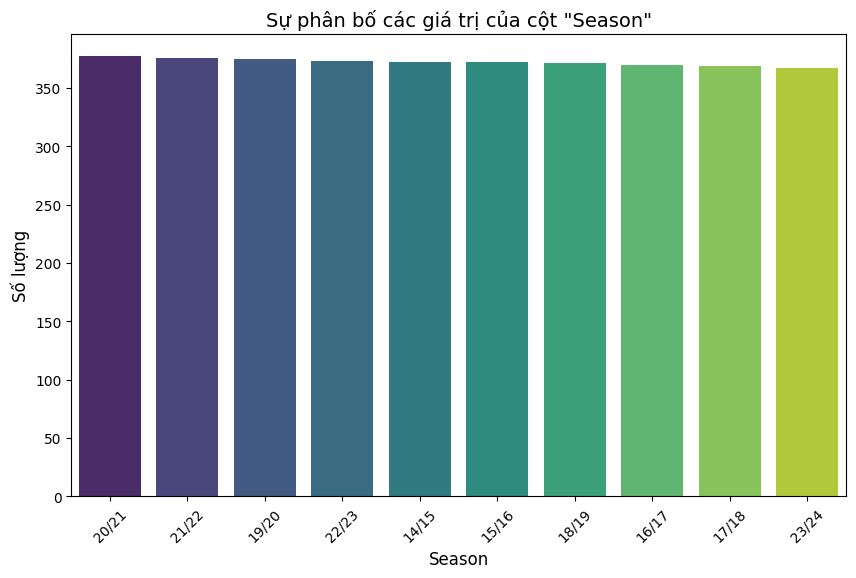

In [22]:
season_counts = raw_df_match_overview['Season'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=season_counts.index, y=season_counts.values, palette="viridis")

plt.title('Sự phân bố các giá trị của cột "Season"', fontsize=14)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Số lượng', fontsize=12)

plt.xticks(rotation=45)
plt.show()

Sau khi loại bỏ các dữ liệu, ta thấy số lượng các trận giữa các mùa giải không chênh lệch quá nhiều, nên ta có thể tiếp tục bài toán của chúng ta

C:\Users\ACER\AppData\Local\Temp\ipykernel_20736\3426223329.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Fulltime_Score_counts.index, y=Fulltime_Score_counts.values, palette="viridis")


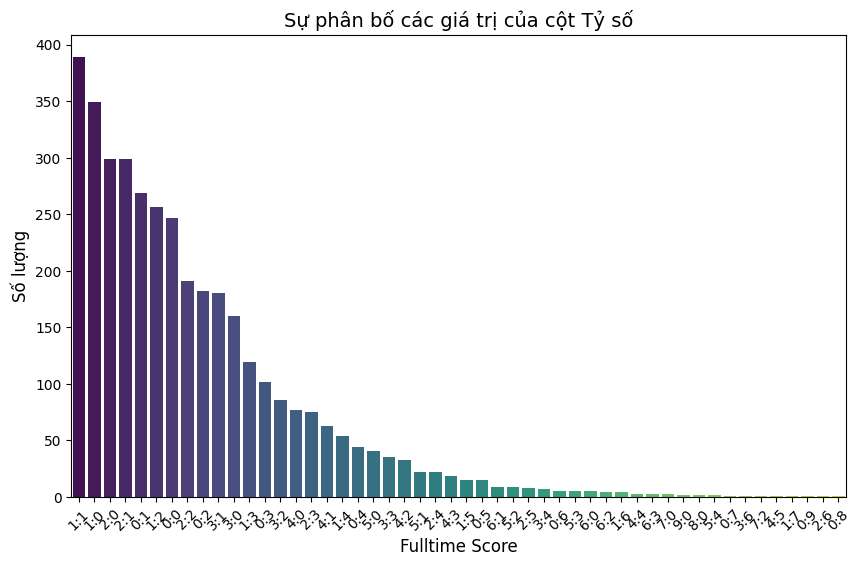

In [23]:
Fulltime_Score_counts = raw_df_match_overview['Fulltime Score'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=Fulltime_Score_counts.index, y=Fulltime_Score_counts.values, palette="viridis")

plt.title('Sự phân bố các giá trị của cột Tỷ số', fontsize=14)
plt.xlabel('Fulltime Score', fontsize=12)
plt.ylabel('Số lượng', fontsize=12)

plt.xticks(rotation=45)
plt.show()

C:\Users\ACER\AppData\Local\Temp\ipykernel_20736\3041169351.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=winner_counts.index, y=winner_counts.values, palette="viridis")


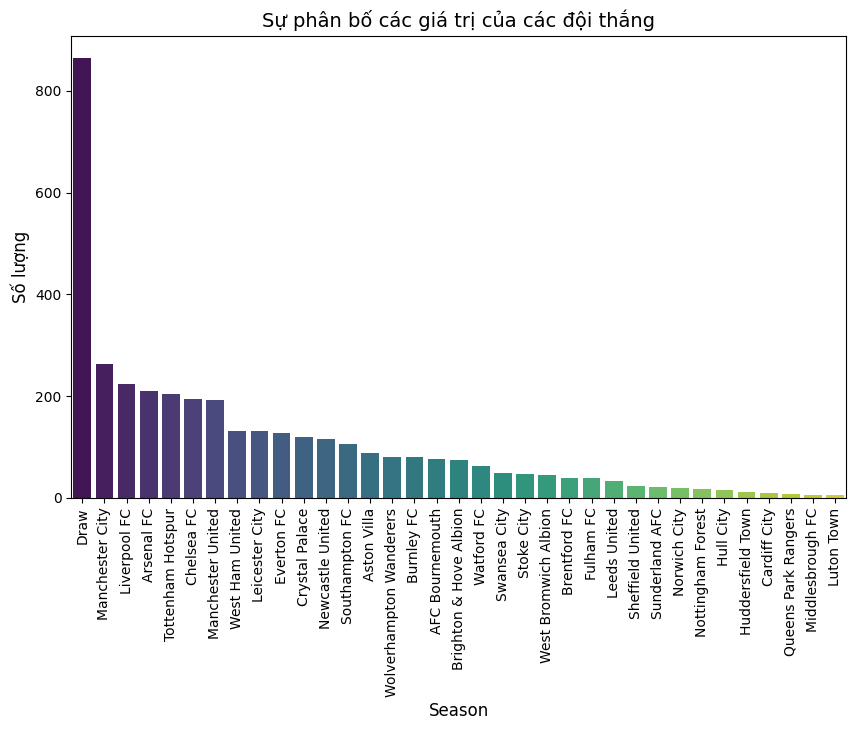

In [24]:
winner_counts = raw_df_match_overview['Winner'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=winner_counts.index, y=winner_counts.values, palette="viridis")

plt.title('Sự phân bố các giá trị của các đội thắng', fontsize=14)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Số lượng', fontsize=12)

plt.xticks(rotation=90)
plt.show()

# C. Chuẩn hóa dữ liệu

Trước hết, ta sẽ xem thử mỗi đặc trưng có kiểu dữ liệu như thế nào

In [25]:
dtype = raw_df_match_overview.dtypes
dtype

Match ID          object
Date              object
Season            object
Home Team         object
Away Team         object
Home Lineup       object
Away Lineup       object
Fulltime Score    object
Winner            object
dtype: object

Ta nhận thấy trong dữ liệu này, tất cả thuộc tính đều ở dạng *object*, khiến việc chuẩn hóa dữ liệu **numeric** không thể thực hiện được.

Việc chuẩn hóa chỉ áp dụng cho dữ liệu dạng số để đưa các giá trị về cùng một thang đo, nên không thể áp dụng các phương pháp như Min-Max Scaling hay Z-score trong trường hợp này. Hơn nữa, các cột như Match ID và Season không có ý nghĩa về mặt thang đo liên tục, trong khi các cột như Home Team và Winner mang tính phân loại, vốn không cần chuẩn hóa mà cần mã hóa (encoding).

Ngoài ra, khi đến bước tiến hành sử dụng Model, nhóm đã quyết định sử dụng những thuật toán Học Máy không đòi hỏi giá trị dữ liệu là số, nên ta không cần áp dụng kỹ thuật như Label Encoding hoặc One-Hot Encoding để chuyển đổi các giá trị phân loại này thành dạng số.

Ngoài ra, ở file **match_statistic.csv** tồn tại một số trận chứa dữ liệu bị trống, do đó khi đã làm sạch dữ liệu file trên, thì ta cũng sẽ cập nhật những trận đấu trong file **match_overview.csv**

In [26]:
match_statistic_file_name = "./data/raw_data/match_statistic.csv"
clean_df_match_statistic = pd.read_csv(match_statistic_file_name, sep='\t')
clean_df_match_statistic["match_id"] = clean_df_match_statistic["match_id"].astype(str)

In [27]:
match_ids = clean_df_match_statistic["match_id"].tolist()
match_id_dict = {index: match_id for index, match_id in enumerate(match_ids)}
match_id_dict

{0: '3050176',
 1: '3050173',
 2: '3050175',
 3: '3050171',
 4: '3050170',
 5: '3050172',
 6: '3050174',
 7: '3050167',
 8: '3050168',
 9: '3050169',
 10: '3050179',
 11: '3050183',
 12: '3050185',
 13: '3050182',
 14: '3050180',
 15: '3050184',
 16: '3050186',
 17: '3050181',
 18: '3050177',
 19: '3050178',
 20: '3050190',
 21: '3050196',
 22: '3050187',
 23: '3050188',
 24: '3050194',
 25: '3050191',
 26: '3050195',
 27: '3050189',
 28: '3050192',
 29: '3050193',
 30: '3050203',
 31: '3050197',
 32: '3050201',
 33: '3050200',
 34: '3050202',
 35: '3050206',
 36: '3050204',
 37: '3050199',
 38: '3050198',
 39: '3050205',
 40: '3050214',
 41: '3050208',
 42: '3050207',
 43: '3050211',
 44: '3050212',
 45: '3050210',
 46: '3050216',
 47: '3050215',
 48: '3050209',
 49: '3050213',
 50: '3050219',
 51: '3050222',
 52: '3050220',
 53: '3050221',
 54: '3050224',
 55: '3050223',
 56: '3050217',
 57: '3050218',
 58: '3050226',
 59: '3050225',
 60: '3050235',
 61: '3050227',
 62: '3050231',
 6

In [28]:
raw_df_match_overview = raw_df_match_overview[raw_df_match_overview["Match ID"].isin(match_id_dict.values())]
raw_df_match_overview = raw_df_match_overview[raw_df_match_overview["Match ID"].isin(match_id_dict.values())]

raw_df_match_overview

,Match ID,Date,Season,Home Team,Away Team,Home Lineup,Away Lineup,Fulltime Score,Winner
0,3050173,2018-08-11,18/19,Newcastle United,Tottenham Hotspur,4-4-1-1,4-3-2-1,1:2,Tottenham Hotspur
1,3050169,2018-08-11,18/19,Fulham FC,Crystal Palace,4-3-3 Attacking,4-4-2,0:2,Crystal Palace
2,3050168,2018-08-11,18/19,AFC Bournemouth,Cardiff City,4-4-2 double 6,4-1-4-1,2:0,AFC Bournemouth
3,3050176,2018-08-11,18/19,Wolverhampton Wanderers,Everton FC,3-4-3,4-2-3-1,2:2,Draw
4,3050172,2018-08-10,18/19,Manchester United,Leicester City,4-1-4-1,4-4-2 double 6,2:1,Manchester United
...,...,...,...,...,...,...,...,...,...
3795,4095461,2024-05-19,23/24,Sheffield United,Tottenham Hotspur,5-3-2,4-2-3-1,0:3,Tottenham Hotspur
3796,4095443,2024-05-11,23/24,Everton FC,Sheffield United,4-4-1-1,3-5-2 flat,1:0,Everton FC
3797,4095459,2024-05-19,23/24,Luton Town,Fulham FC,3-4-3,4-2-3-1,2:4,Fulham FC
3798,4095452,2024-05-19,23/24,Arsenal FC,Everton FC,4-3-3 Attacking,4-4-1-1,2:1,Arsenal FC


Vậy là chúng ta đã tiền xử lý được dữ liệu, ta sẽ lưu dữ liệu mới vào file mới

In [29]:
raw_df_match_overview.to_csv('match_overview_clean.csv', sep='\t', encoding='utf-8', index=False, header=True)